# General Template

**Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from imblearn.over_sampling import SMOTE

# Impport own functions
import importlib
import cleaning_pipeline, plots

c = importlib.reload(cleaning_pipeline)
p = importlib.reload(plots)

**Import**

In [2]:
# data = pd.read_csv('your_dataset.csv')

# import pandas as pd
# import numpy as np
# from datetime import datetime, timedelta

# # Create a random date within a specific range
# def random_date(start_date, end_date):
#     return start_date + timedelta(
#         seconds=np.random.randint(0, int((end_date - start_date).total_seconds())))

# # Set random seed for reproducibility
# np.random.seed(0)

# # Create dates
# start_date = datetime(2023, 1, 1)
# end_date = datetime(2023, 12, 31)
# dates = [random_date(start_date, end_date) for _ in range(100)]

# # Create binary variables (0 or 1)
# binary_values = np.random.randint(0, 2, size=100)

# # Create categorical variables
# categories = ['Category_A', 'Category_B', 'Category_C']
# categorical_values = np.random.choice(categories, size=100)

# # Create numeric variables with outliers
# numeric_values = np.concatenate([np.random.normal(20, 5, 90), np.random.normal(200, 50, 10)])

# # Introduce NaN values, empty fields, and outliers
# numeric_values[5] = np.nan  # NaN value
# numeric_values[15] = 1000  # Outlier
# numeric_values[25] = 0    # Empty field

# # Create the DataFrame
# data = pd.DataFrame({
#     'Date': dates,
#     'Binary_Variable': binary_values,
#     'Categorical_Variable': categorical_values,
#     'Numeric_Variable': numeric_values,
#     'Empty_Column': [""] * 100,  # Empty column
#     'NaN_Column': [np.nan] * 100,  # NaN column
#     'Outlier_Column': [200] * 95 + [1000] * 5  # Outlier column
# })

# # Shuffle the DataFrame
# data = data.sample(frac=1, random_state=0).reset_index(drop=True)

# # Display the first few rows of the dataset
# print(data.head())
# data.to_csv('data.csv', index=False)

In [3]:
# from sklearn.datasets import load_iris
# data = load_iris()
# data = pd.DataFrame(data=data.data, columns=data.feature_names)


In [4]:
data = pd.read_csv("data.csv")

data = data.rename(columns ={'Numeric_Variable' : 'target', 'NaN_Column' : 'irrelevant_column' })

data

,Date,Binary_Variable,Categorical_Variable,target,Empty_Column,irrelevant_column,Outlier_Column
0,2023-01-08 00:32:25,1,Category_B,23.998808,NaN,NaN,200
1,2023-12-07 08:53:31,0,Category_A,19.892576,NaN,NaN,200
2,2023-07-31 08:40:21,1,Category_A,25.304756,NaN,NaN,200
3,2023-01-30 19:09:40,0,Category_A,16.428919,NaN,NaN,200
4,2023-08-19 12:44:26,0,Category_B,20.909895,NaN,NaN,200
...,...,...,...,...,...,...,...
95,2023-02-24 18:09:24,1,Category_A,124.098565,NaN,NaN,1000
96,2023-01-23 06:29:09,0,Category_C,22.438297,NaN,NaN,200
97,2023-04-30 14:04:48,1,Category_A,18.337931,NaN,NaN,200
98,2023-12-20 08:47:28,1,Category_C,19.575549,NaN,NaN,200


## Exploration
**Get columns by datatype**

In [5]:
numeric_cols, non_numeric_cols, categorical_cols, binary_cols, date_cols = c.categorize_columns(data)
target = data['target']
print("Numeric Columns:", numeric_cols)
print("Non-Numeric Columns:", non_numeric_cols)
print("Categorical Columns:", categorical_cols)
print("Binary Columns:", binary_cols)
print("Date Columns:", date_cols)

Numeric Columns: ['Binary_Variable', 'target', 'Outlier_Column']
Non-Numeric Columns: ['Date', 'Categorical_Variable']
Categorical Columns: ['Date', 'Categorical_Variable']
Binary Columns: []
Date Columns: []


**Descriptive statistics**

In [6]:
c = importlib.reload(cleaning_pipeline)
p = importlib.reload(plots)

In [7]:
# Generate descriptive statistics
description = data.describe(include='all')  # Generate descriptive statistics for all columns
print(description)

# Report inconsitancies and null values
format_report = c.generate_format_report(data, 'sigma')
for column, counts in format_report.items():
    print(f"Column '{column}': \n \
    Empty count = {counts['empty_count']} i.e. {counts['empty_count_percentage']} of the obs., \n \
    Outliers_count = {counts['outliers_count']} i.e. {counts['outliers_percentage']} of the obs.")

                       Date  Binary_Variable Categorical_Variable  \
count                   100       100.000000                  100   
unique                  100              NaN                    3   
top     2023-01-08 00:32:25              NaN           Category_B   
freq                      1              NaN                   39   
mean                    NaN         0.460000                  NaN   
std                     NaN         0.500908                  NaN   
min                     NaN         0.000000                  NaN   
25%                     NaN         0.000000                  NaN   
50%                     NaN         0.000000                  NaN   
75%                     NaN         1.000000                  NaN   
max                     NaN         1.000000                  NaN   

             target  Empty_Column  irrelevant_column  Outlier_Column  
count     99.000000           0.0                0.0      100.000000  
unique          NaN          

**Visualisation**

*Numeric variables*

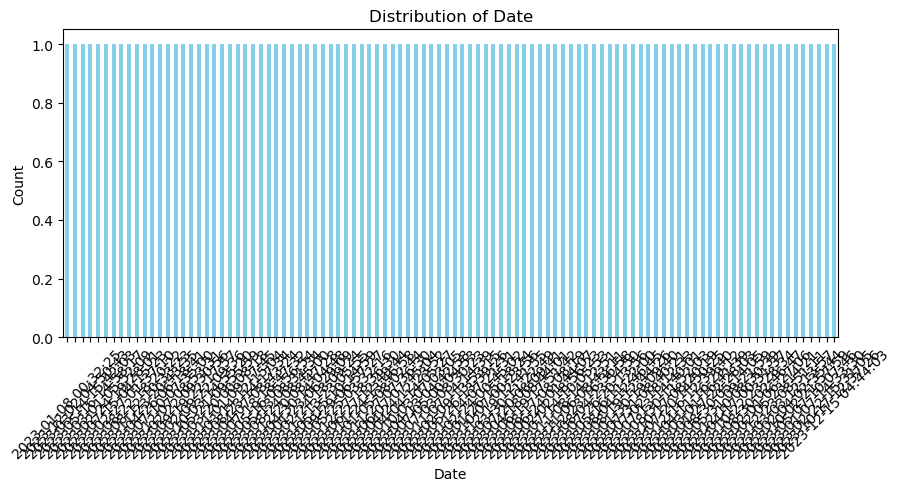

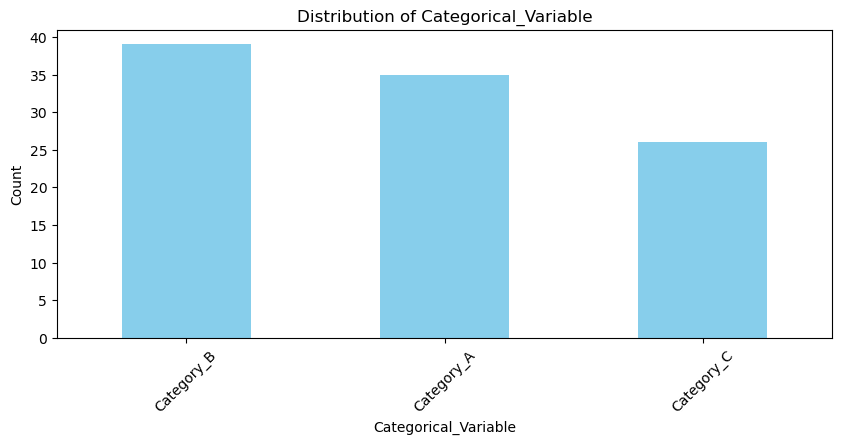

<Figure size 400x400 with 0 Axes>

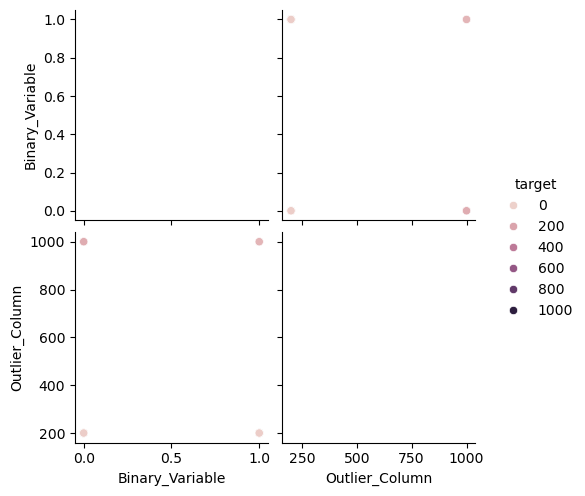

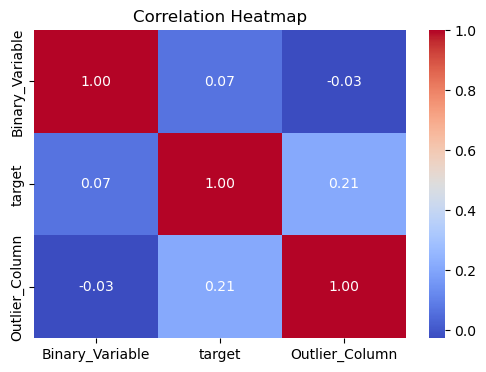

In [8]:
for column in non_numeric_cols:
    histogram_fig = p.visualize_categorical_distribution(data, column)
    plt.show(histogram_fig)

# Visualize relationships using pair plots (for numerical variables)
pairplot_fig = p.visualize_numeric_relationship_pairplot(data, numeric_cols, 'target')
plt.show(pairplot_fig)

# Visualize relationships using a heatmap (for correlation between numerical variables)
heatmap_fig = p.visualize_numeric_relationship_heatmap(data, numeric_cols)
plt.show(heatmap_fig)

*Non numeric variables*

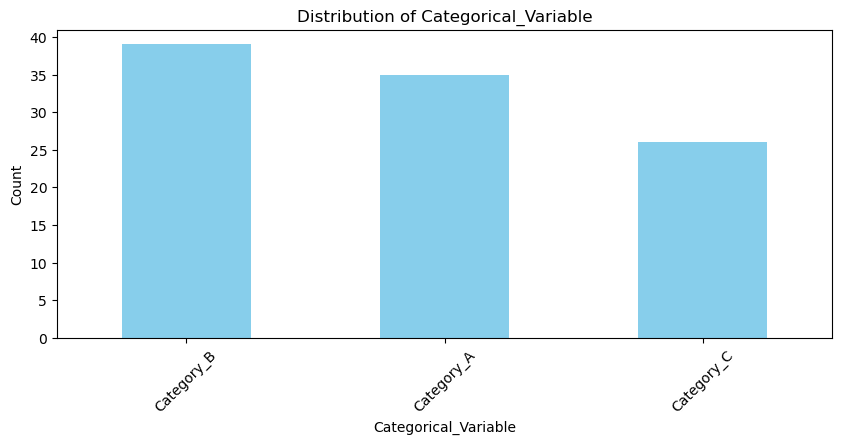

In [9]:
# should ^loop in non numeric here
visualize_categorical_distribution = p.visualize_categorical_distribution(data, 'Categorical_Variable')
plt.show(visualize_categorical_distribution)

## Cleaning

In [10]:
data.columns

data

,Date,Binary_Variable,Categorical_Variable,target,Empty_Column,irrelevant_column,Outlier_Column
0,2023-01-08 00:32:25,1,Category_B,23.998808,NaN,NaN,200
1,2023-12-07 08:53:31,0,Category_A,19.892576,NaN,NaN,200
2,2023-07-31 08:40:21,1,Category_A,25.304756,NaN,NaN,200
3,2023-01-30 19:09:40,0,Category_A,16.428919,NaN,NaN,200
4,2023-08-19 12:44:26,0,Category_B,20.909895,NaN,NaN,200
...,...,...,...,...,...,...,...
95,2023-02-24 18:09:24,1,Category_A,124.098565,NaN,NaN,1000
96,2023-01-23 06:29:09,0,Category_C,22.438297,NaN,NaN,200
97,2023-04-30 14:04:48,1,Category_A,18.337931,NaN,NaN,200
98,2023-12-20 08:47:28,1,Category_C,19.575549,NaN,NaN,200


In [18]:
data_cleaned

,Date,Binary_Variable,target,Empty_Column,Outlier_Column,Categorical_Variable_categorya,Categorical_Variable_categoryb,Categorical_Variable_categoryc,Date_day,Date_month,Date_year
0,2023-01-08 00:32:25,1.0,0.465906,NaN,0.0,False,True,False,8,1,2023
1,2023-12-07 08:53:31,0.0,0.439934,NaN,0.0,True,False,False,7,12,2023
2,2023-07-31 08:40:21,1.0,0.473276,NaN,0.0,True,False,False,31,7,2023
3,2023-01-30 19:09:40,0.0,0.413697,NaN,0.0,True,False,False,30,1,2023
4,2023-08-19 12:44:26,0.0,0.446815,NaN,0.0,False,True,False,19,8,2023
...,...,...,...,...,...,...,...,...,...,...,...
95,2023-02-24 18:09:24,1.0,0.698983,NaN,1.0,True,False,False,24,2,2023
96,2023-01-23 06:29:09,0.0,0.456576,NaN,0.0,False,False,True,23,1,2023
97,2023-04-30 14:04:48,1.0,0.428741,NaN,0.0,True,False,False,30,4,2023
98,2023-12-20 08:47:28,1.0,0.437720,NaN,0.0,False,False,True,20,12,2023


In [23]:
data_cleaned = c.handle_null_values(data, 'target')
data_cleaned = c.handle_duplicates(data_cleaned)

# String
data_cleaned = c.handle_formatting_inconsistencies(data_cleaned, ['Categorical_Variable'])
data_cleaned = c.handle_text_data(data_cleaned, 'Categorical_Variable' )
data_cleaned = c.handle_categorical_data(data_cleaned, ['Categorical_Variable'])

data_cleaned = c.handle_date_time_data(data_cleaned, ['Date'])

data_cleaned = c.handle_redundant_features(data_cleaned, ['irrelevant_column'])
data_cleaned = c.transform_data(data_cleaned, numeric_cols)

# # Numeric columns
data_cleaned = c.scale_numerical_features(data_cleaned, numeric_cols )

data_cleaned = c.handle_imbalanced_data(data_cleaned, 'target')

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:

# String
data_cleaned = c.handle_formatting_inconsistencies(data_cleaned, ['Categorical_Variable'])
data_cleaned = c.handle_text_data(data_cleaned, 'Categorical_Variable' )
data_cleaned = c.handle_categorical_data(data_cleaned, ['Categorical_Variable'])

data_cleaned = c.handle_date_time_data(data_cleaned, ['Date'])

data_cleaned = c.handle_redundant_features(data_cleaned, ['irrelevant_column'])
data_cleaned = c.handle_spelling_errors(data_cleaned, 'Categorical_Variable')
data_cleaned = c.transform_data(data_cleaned, numeric_cols)

# Numeric columns
data_cleaned = c.scale_numerical_features(data_cleaned, numeric_cols )

for col in numeric_cols :
    
    data_cleaned = handle_outliers_zscore(data_cleaned, col )
    data_cleaned = handle_outliers_iqr(data_cleaned, col )
    
    
data_cleaned = c.handle_imbalanced_data(data_cleaned, 'target')

**Outlier**

In [ ]:
# Choose a outlier rule
lower_bound, upper_bound = filter_outliers_sigma(data, 'sepal length (cm)')
# lower_bound, upper_bound = handle_outliers_iqr(data, 'numeric_col')

# Filter df
filtered_df = df[(series >= lower_bound) & (series <= upper_bound)]

**Eventual Saving of the cleaned data**

In [ ]:
# Save the cleaned data to a new file
#data_cleaned.to_csv('cleaned_dataset.csv', index=False)

In [21]:

c = importlib.reload(cleaning_pipeline)
p = importlib.reload(plots)